In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
x_train = np.linspace(-1, 1, 20)

In [12]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [22]:
x_test = np.linspace(-1, 1, 20)

In [24]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

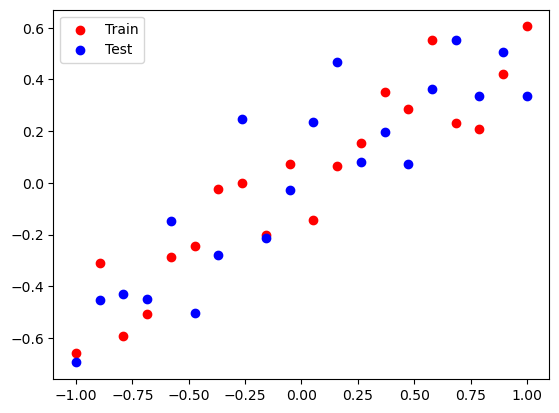

In [26]:
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='blue',label='Test')
plt.legend()
plt.show()

In [28]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='linear'))

adam = Adam(learning_rate = 0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), verbose=False)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#Evaluate the mse
train_mse = model_1.evaluate(x_train,y_train,verbose=0)
test_mse = model_1.evaluate(x_test, y_test, verbose=0)
#print(('Train:{}, Test:{}

In [32]:
y_pred_1 = model_1.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


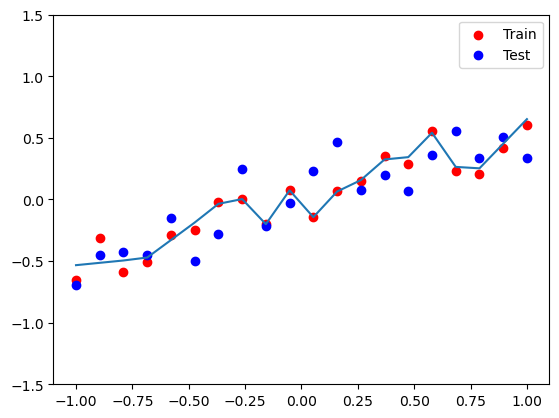

In [34]:
plt.figure()
plt.scatter(x_train,y_train,c='red', label='Train')
plt.scatter(x_test,y_test,c='blue', label='Test')
plt.plot(x_test,y_pred_1)
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()

In [38]:
#Dropout Model
model2 = Sequential()
model2.add(Dense(128, input_dim=1, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model2.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model2.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), verbose=False)

In [42]:
#Evaluate the mse
train_mse = model2.evaluate(x_train,y_train,verbose=0)
test_mse = model2.evaluate(x_test, y_test, verbose=0)

In [44]:
y_pred_2 = model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


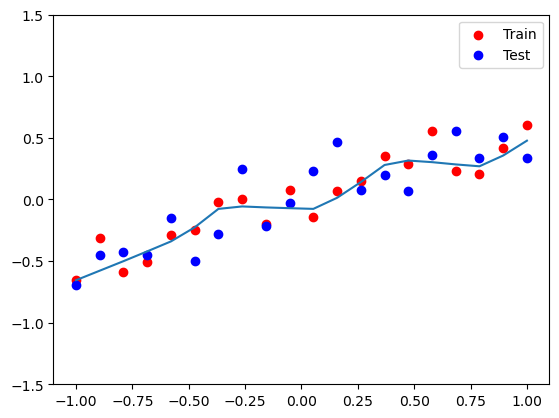

In [46]:
plt.figure()
plt.scatter(x_train,y_train,c='red', label='Train')
plt.scatter(x_test,y_test,c='blue', label='Test')
plt.plot(x_test,y_pred_2)
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()